# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [3]:
uploaded= files.upload()

Saving delivery_time.csv to delivery_time.csv


In [4]:
deliverytime=pd.read_csv('delivery_time.csv')
deliverytime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
deliverytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
deliverytime=deliverytime.rename({'Sorting Time':'Sorting_Time','Delivery Time':'Delivery_Time'},axis=1)
deliverytime

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<ipython-input-7-37643ec0ba8a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Sorting_Time',y='Delivery_Time',data=deliverytime,palette='set1')


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

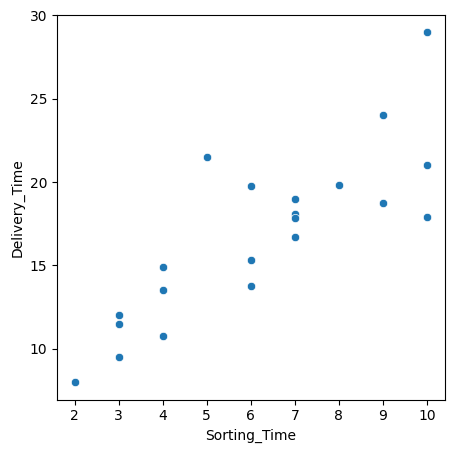

In [7]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Sorting_Time',y='Delivery_Time',data=deliverytime,palette='set1')

In [8]:
deliverytime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<ipython-input-9-e943bc78497e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deliverytime['Sorting_Time'])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

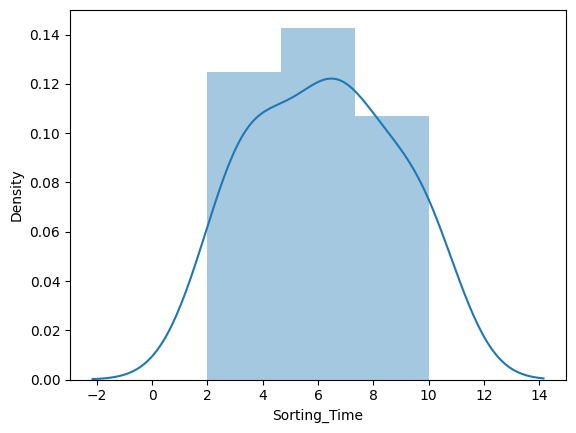

In [9]:
sns.distplot(deliverytime['Sorting_Time'])

<ipython-input-10-9b7787f00932>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deliverytime['Delivery_Time'])


<Axes: xlabel='Delivery_Time', ylabel='Density'>

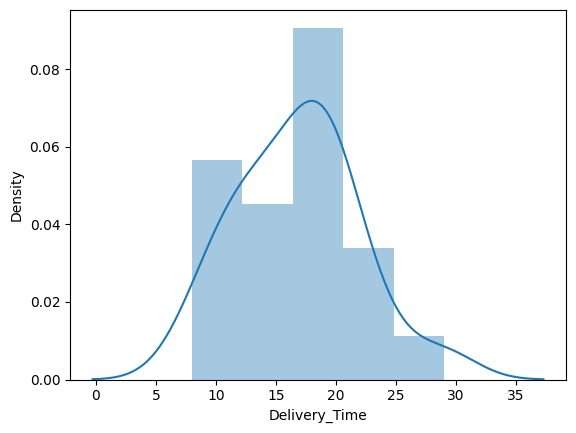

In [10]:
sns.distplot(deliverytime['Delivery_Time'])

In [11]:
import statsmodels.formula.api as smf

In [12]:
model=smf.ols("Delivery_Time~Sorting_Time",data=deliverytime).fit()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

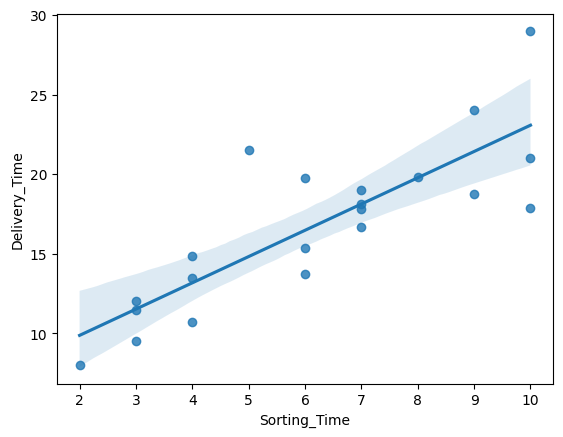

In [13]:
sns.regplot(x = 'Sorting_Time', y= 'Delivery_Time', data = deliverytime)

In [14]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [15]:
deliverytime['Predicted_delivery_time']=model.fittedvalues
deliverytime.head()

,Delivery_Time,Sorting_Time,Predicted_delivery_time
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [16]:
deliverytime['Errors_Sq']=model.resid**2
deliverytime[0:4]

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq
0,21.00,10,23.072933,4.297051
1,13.50,4,13.178814,0.103161
2,19.75,6,16.476853,10.713489
3,24.00,9,21.423913,6.636224


In [17]:
Mean_Squared_Error=deliverytime['Errors_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [18]:
RMSE=np.sqrt(Mean_Squared_Error)
RMSE

2.7916503270617654

In [19]:
model.summary() # R-squared = 0.682

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 05 May 2023   Prob (F-statistic):           3.98e-06
Time:                        09:44:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation

---



In [20]:
import numpy as np
deliverytime['Log_Sorting_Time'] = np.log(deliverytime['Sorting_Time'])
deliverytime.head()

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time
0,21.00,10,23.072933,4.297051,2.302585
1,13.50,4,13.178814,0.103161,1.386294
2,19.75,6,16.476853,10.713489,1.791759
3,24.00,9,21.423913,6.636224,2.197225
4,29.00,10,23.072933,35.130124,2.302585


<ipython-input-21-de9e779e8483>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deliverytime['Log_Sorting_Time'])


<Axes: xlabel='Log_Sorting_Time', ylabel='Density'>

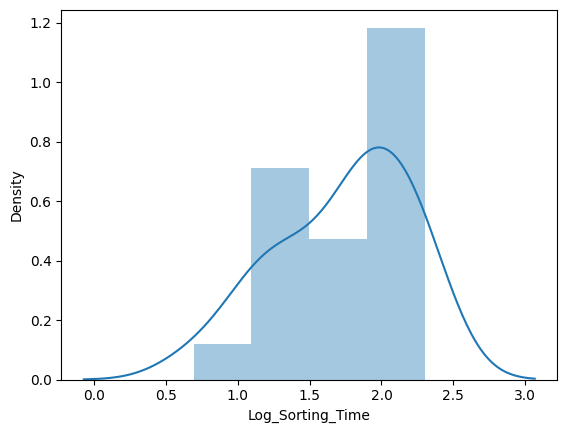

In [21]:
sns.distplot(deliverytime['Log_Sorting_Time'])

In [22]:
Log_model=smf.ols("Delivery_Time~Log_Sorting_Time",data=deliverytime).fit()

<Axes: xlabel='Log_Sorting_Time', ylabel='Delivery_Time'>

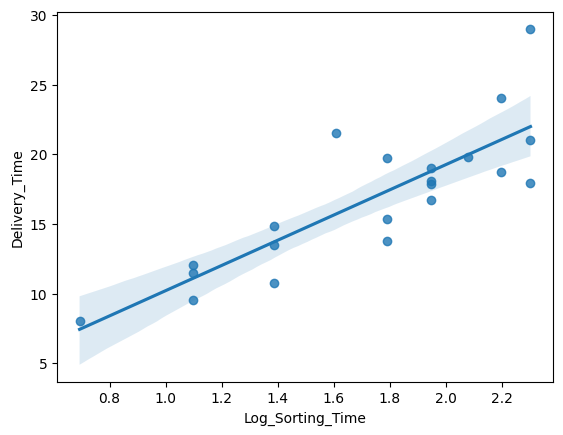

In [23]:
sns.regplot(x='Log_Sorting_Time',y='Delivery_Time',data=deliverytime)

In [24]:
deliverytime['Log_Errors_Sq']=Log_model.resid**2
deliverytime[0:4]

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time,Log_Errors_Sq
0,21.00,10,23.072933,4.297051,2.302585,0.966117
1,13.50,4,13.178814,0.103161,1.386294,0.038619
2,19.75,6,16.476853,10.713489,1.791759,5.696312
3,24.00,9,21.423913,6.636224,2.197225,8.820343


In [25]:
Log_Mean_Squared_Error=deliverytime['Log_Errors_Sq'].mean()
Log_Mean_Squared_Error

7.470226320948425

In [26]:
Log_RMSE=np.sqrt(Log_Mean_Squared_Error)
Log_RMSE

2.733171476682066

In [27]:
Log_model.summary() # R-squared = 0.695

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.64e-06
Time:                        09:44:53   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
Log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SQRT Transformation

---



In [28]:
deliverytime['SQRT_Sorting_Time'] = np.sqrt(deliverytime['Sorting_Time'])
deliverytime.head()

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time,Log_Errors_Sq,SQRT_Sorting_Time
0,21.00,10,23.072933,4.297051,2.302585,0.966117,3.162278
1,13.50,4,13.178814,0.103161,1.386294,0.038619,2.000000
2,19.75,6,16.476853,10.713489,1.791759,5.696312,2.449490
3,24.00,9,21.423913,6.636224,2.197225,8.820343,3.000000
4,29.00,10,23.072933,35.130124,2.302585,49.239517,3.162278


<ipython-input-29-46547532ce38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deliverytime['SQRT_Sorting_Time'])


<Axes: xlabel='SQRT_Sorting_Time', ylabel='Density'>

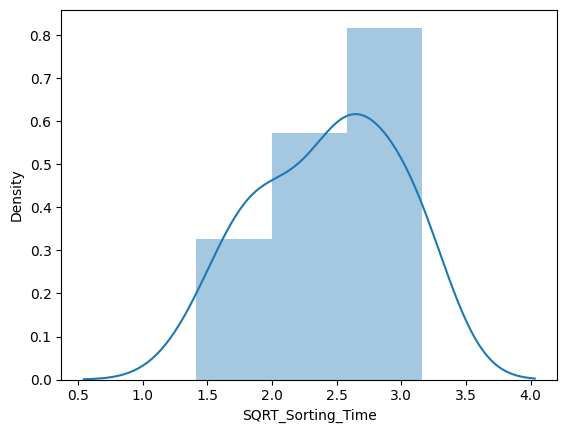

In [29]:
sns.distplot(deliverytime['SQRT_Sorting_Time'])

In [30]:
SQRT_model=smf.ols("Delivery_Time~SQRT_Sorting_Time",data=deliverytime).fit()

<Axes: xlabel='SQRT_Sorting_Time', ylabel='Delivery_Time'>

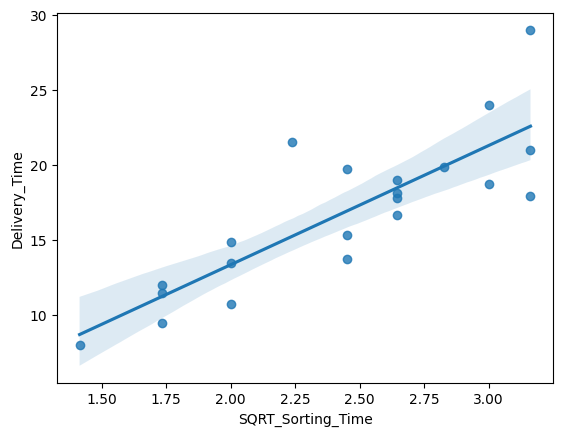

In [31]:
sns.regplot(x='SQRT_Sorting_Time',y='Delivery_Time',data=deliverytime)

In [32]:
deliverytime['SQRT_Errors_Sq']=SQRT_model.resid**2
deliverytime[0:4]

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time,Log_Errors_Sq,SQRT_Sorting_Time,SQRT_Errors_Sq
0,21.00,10,23.072933,4.297051,2.302585,0.966117,3.162278,2.492821
1,13.50,4,13.178814,0.103161,1.386294,0.038619,2.000000,0.021215
2,19.75,6,16.476853,10.713489,1.791759,5.696312,2.449490,7.998936
3,24.00,9,21.423913,6.636224,2.197225,8.820343,3.000000,7.339030


In [33]:
SQRT_Mean_Squared_Error=deliverytime['SQRT_Errors_Sq'].mean()
SQRT_Mean_Squared_Error

7.461328308595396

In [34]:
SQRT_RMSE=np.sqrt(SQRT_Mean_Squared_Error)
SQRT_RMSE

2.731543210091211

In [35]:
SQRT_model.summary() # R-squared = 0.696

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 05 May 2023   Prob (F-statistic):           2.61e-06
Time:                        09:44:54   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
SQRT_Sorting_Time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponential Transformation

In [36]:
deliverytime['Exp_Sorting_Time'] = np.exp(deliverytime['Sorting_Time'])
deliverytime.head()

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time,Log_Errors_Sq,SQRT_Sorting_Time,SQRT_Errors_Sq,Exp_Sorting_Time
0,21.00,10,23.072933,4.297051,2.302585,0.966117,3.162278,2.492821,22026.465795
1,13.50,4,13.178814,0.103161,1.386294,0.038619,2.000000,0.021215,54.598150
2,19.75,6,16.476853,10.713489,1.791759,5.696312,2.449490,7.998936,403.428793
3,24.00,9,21.423913,6.636224,2.197225,8.820343,3.000000,7.339030,8103.083928
4,29.00,10,23.072933,35.130124,2.302585,49.239517,3.162278,41.230949,22026.465795


<ipython-input-37-78ab418e9fe7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deliverytime['Exp_Sorting_Time'])


<Axes: xlabel='Exp_Sorting_Time', ylabel='Density'>

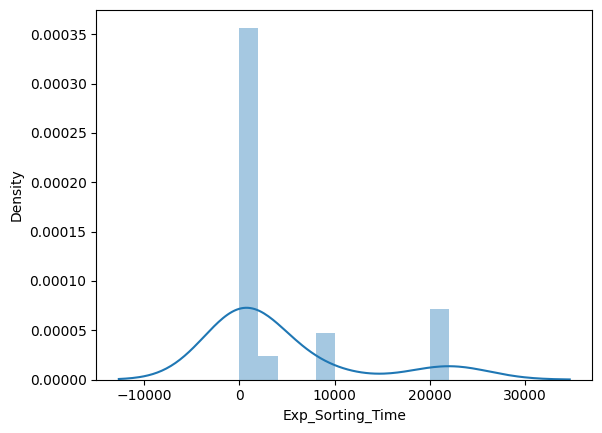

In [37]:
sns.distplot(deliverytime['Exp_Sorting_Time'])

In [38]:
Exp_model=smf.ols("Delivery_Time~Exp_Sorting_Time",data=deliverytime).fit()

<Axes: xlabel='Exp_Sorting_Time', ylabel='Delivery_Time'>

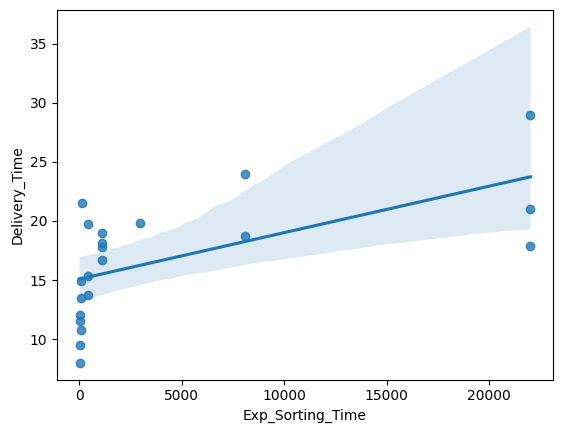

In [39]:
sns.regplot(x='Exp_Sorting_Time',y='Delivery_Time',data=deliverytime)

In [40]:
deliverytime['Exp_Errors_Sq']=Exp_model.resid**2
deliverytime[0:4]

,Delivery_Time,Sorting_Time,Predicted_delivery_time,Errors_Sq,Log_Sorting_Time,Log_Errors_Sq,SQRT_Sorting_Time,SQRT_Errors_Sq,Exp_Sorting_Time,Exp_Errors_Sq
0,21.00,10,23.072933,4.297051,2.302585,0.966117,3.162278,2.492821,22026.465795,7.502572
1,13.50,4,13.178814,0.103161,1.386294,0.038619,2.000000,0.021215,54.598150,2.576131
2,19.75,6,16.476853,10.713489,1.791759,5.696312,2.449490,7.998936,403.428793,20.321080
3,24.00,9,21.423913,6.636224,2.197225,8.820343,3.000000,7.339030,8103.083928,32.858574


In [41]:
Exp_Mean_Squared_Error=deliverytime['Exp_Errors_Sq'].mean()
Exp_Mean_Squared_Error

15.670638280266925

In [42]:
Exp_RMSE=np.sqrt(Exp_Mean_Squared_Error)
Exp_RMSE

3.958615702523664

In [43]:
Exp_model.summary() # R-squared = 0.361

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Fri, 05 May 2023   Prob (F-statistic):            0.00396
Time:                        09:44:54   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.0836      1.047     14.406      0.000      12.892      17.275
Exp_Sorting_Time     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SQRT_model has the highest R-squared value( 0.696 )

# Predictions for SQRT_model


In [49]:
newdata=pd.Series([1,20,11,13])
newdata

0     1
1    20
2    11
3    13
dtype: int64

In [51]:
newpredict=pd.DataFrame(newdata,columns=['SQRT_Sorting_Time'])
newpredict

,SQRT_Sorting_Time
0,1
1,20
2,11
3,13


In [53]:
newpredict['predicted']=SQRT_model.predict(newpredict)
newpredict

,SQRT_Sorting_Time,predicted
0,1,5.417754
1,20,156.212978
2,11,84.783662
3,13,100.656843
